# Tourism in Ireland (Arrivals Analysis)
#### This Jupiter Notebook is broken down into the following sections.
1. Exploring the datasets
2. Functions 
3. Explanatory Data Analysis
4. Statistics 
5. Machine learning
#### Each section has a brief explanation of the process it undergoes as well as the rationale for the strategies used.

## 1 Exploring the datasets
#### ASM03: International Travel (Arrivals, Departures) To Ireland Counts
* Sources: https://data.cso.ie/table/ASM03
* Attributes: 
- Statistic label: Air and Sea Travel (Thousands)
- Month: Monthly
- Direction: Arrivals, Departures
- Country: countries
- Unit: Thousands
- Value: Value of the above Statistic label

#### ASM01: Modes of Travel (Arrivals, Departures) To Ireland Counts
* Sources: https://data.cso.ie/table/ASM01
* Attributes:
- Statistic Label: Air and Sea Travel
- Month: Monthly
- Direction: Arrivals, Departures
- Mode: All modes of transport, Air, Sea
- Unit: Thousands
- Value: Value of the above Statistic label

#### ASM02: Route of Travel (Arrivals, Departures) To Ireland Counts
* Sources: https://data.cso.ie/table/ASM02
* Attributes:
- Statistic Label: Air and Sea Travel
- Month: Monthly
- Direction: Arrivals, Departures
- Route: All route of travel, cross channel, continental Europe, Transatlantic, Other
- Unit: Thousands
- Value: Value of the above Statistic label

#### mly532: Weather Data Dublin Airport Station
* Source: https://www.met.ie/climate/available-data/historical-data
* Attributes:
- year: - Year
- month: - Month
- rain: - Precipitation Amount (mm)
- meant: - Mean Air Temperature (C)
- maxtp: - Maximum Air Temperature (C)
- mintp: - Minimum Air Temperature (C)
- mnmax: - Mean Maximum Temperature (C)
- mnmin: - Mean Minimum Temperature (C)
- gmin: - Grass Minimum Temperature (C)
- wdsp: - Mean Wind Speed (knot)
- mxgt: - Highest Gust (knot)
- sun: - Sunshine duration (hours)
- ind: - Indicator


## 2 Functions:
#### The functions in the cells below were constructed to facilitate the reuse of the same code as needed
- The following websites were used to construct the functions:
  * https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
  * https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/
  * https://www.askpython.com/python-modules/pandas/change-datetime-format-in-pandas

In [1]:
#Function_1: Column companation function
def combine(df, newCol_name, col1, col2):
    comb_df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original one
    comb_df[newCol_name] = df[col1].apply(str) +'_'+ df[col2].apply(str)
    return comb_df

In [2]:
#Function_2: Pivot function that allows to pivot tables based on month column in the datasets:
def pivot_dataset(df, column, value):
    pivot_df = df.pivot_table(index='Month',
                              columns=column,
                              values=value,
                              aggfunc='first')
    pivot_df.reset_index(inplace=True)
    return pivot_df


In [3]:
#Function_3: Drop column function
def drop_it(df, columns):
    df.drop(columns=columns, inplace=True)
    return df

In [4]:
#Function_4: Date column reshape and sort
def sort(df,dateCol):
    # Convert 'Month' column to datetime format & Format the dates as strings in the 'YYYY-MM' format
    df['Date'] = pd.to_datetime(df[dateCol],format='%Y %B').dt.strftime('%Y-%m')
    # Insert the 'date_new' column to the first position in the DataFrame
    df.insert(0, 'Date', df.pop('Date'))
    # Sort the DataFrame by the 'Month' column
    df_sorted = df.sort_values(by='Date')
    #Reset the index to match the desired output
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

## Explanatory Data Analysis
Descriptive statistics and data profiling were conducted to provide the data scientist with insights into the dataset's structure and basic statistics.

1. Import the required library.
2. Read the datasets.
3. Perform descriptive statistics on each dataset.

Following the determination of the dataset's structure, each dataset underwent cleaning and modification using various techniques. The aim of this dataset manipulation was to prepare the datasets for merging, where they would be combined into a single new dataset utilizing a common column "Month".

Upon merging the datasets, exploratory data analysis (EDA) was once again performed on the merged dataset. Additionally, graphs were utilized to illustrate the trends and relationships within the columns. The resulting merged dataset was then saved to CSV files named "CA1_Arrivals.csv" and "CA1_ArrivalsFull.csv" with the intention of being utilized in the "Time series" Machine Learning Jupiter Notebook.


In [5]:
#Importing the libraries
import numpy as np #To perform a wide variety of mathematical operations on arrays
import pandas as pd #For manubulating the data to use data frame
import matplotlib.pyplot as plt #For ploting
import seaborn as sns #For ploting
%matplotlib inline  

pd.set_option('display.max_columns', 200) #To display all the columns 

In [6]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [7]:
#Read the datasets
travelRoute_df = pd.read_csv('ASM02.20240325T150300.csv')
internationalTour_df=pd.read_csv('ASM03.20240325T140352Country to ireland.csv')
travelMode_df= pd.read_csv('ASM01.20240325T140328.csv')
weather_df=pd.read_csv('mly532.csv')

### EDA on Overseas arrivals and departures by year, month and routing country dataset
Using the imperative programming paradigm

In [8]:
internationalTour_df.tail()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
6079,Air and Sea Travel,2024 January,United Arab Emirates,Departures,Thousand,30.7
6080,Air and Sea Travel,2024 January,Other Countries(42),Arrivals,Thousand,37.2
6081,Air and Sea Travel,2024 January,Other Countries(42),Departures,Thousand,34.7
6082,Air and Sea Travel,2024 January,All countries,Arrivals,Thousand,1302.5
6083,Air and Sea Travel,2024 January,All countries,Departures,Thousand,1281.7


In [9]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6084 non-null   object 
 1   Month            6084 non-null   object 
 2   Country          6084 non-null   object 
 3   Direction        6084 non-null   object 
 4   UNIT             6084 non-null   object 
 5   VALUE            6080 non-null   float64
dtypes: float64(1), object(5)
memory usage: 285.3+ KB


* It was Observed that the count of VALUE feature is showing null values of 4

In [10]:
internationalTour_df.describe()

,VALUE
count,6080.000000
mean,136.604638
std,316.126348
min,0.000000
25%,12.800000
50%,36.100000
75%,85.400000
max,2270.700000


In [11]:
internationalTour_df.describe(include='O')

,STATISTIC Label,Month,Country,Direction,UNIT
count,6084,6084,6084,6084,6084
unique,1,169,18,2,1
top,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand
freq,6084,36,338,3042,6084


#### Dataset Manipulation and Cleaning

The 'Overseas arrivals and departures by year, month, and routing country' dataset underwent reshaping and preparation. Later in this step, the dataset was pivoted so that the 'Month' date column would serve as a unique value. The main purpose of this step was to prepare the dataset to be joined with other datasets, and the following steps were applied:

1. A combined column was added to prepare the table for pivoting using Function_1.
2. The pivot operation was performed on the dataset with the 'Month' date serving as the index, utilizing Function_2.
3. The date column 'Month' was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and ascendingly sorted to start from 2010-01 to 2024-02 using Function_4.
4. Handling of missing values.
5. Tidying up the dataset.
6. Unnecessary columns were dropped using Function_3.

In [12]:
#Combine two columns into one column Using companation function
internationalTour_df=combine(internationalTour_df,'Country_Direction', 'Country', 'Direction')

In [13]:
#Using Pivot function 
internationalTour_df=pivot_dataset(internationalTour_df, 'Country_Direction', 'VALUE')

In [14]:
#Using date format /sort function
internationalTour_df=sort(internationalTour_df,'Month')

In [15]:
internationalTour_df.head()

Country_Direction,Date,Month,All countries_Arrivals,All countries_Departures,Belgium_Arrivals,Belgium_Departures,France_Arrivals,France_Departures,Germany_Arrivals,Germany_Departures,Great Britain_Arrivals,Great Britain_Departures,Italy_Arrivals,Italy_Departures,Netherlands_Arrivals,Netherlands_Departures,Other Countries(42)_Arrivals,Other Countries(42)_Departures,Other Europe (34)_Arrivals,Other Europe (34)_Departures,Other Transatlantic Countries(1)_Arrivals,Other Transatlantic Countries(1)_Departures,Other UK (1)_Arrivals,Other UK (1)_Departures,Poland_Arrivals,Poland_Departures,Portugal_Arrivals,Portugal_Departures,"Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals","Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Departures",Spain_Arrivals,Spain_Departures,Switzerland_Arrivals,Switzerland_Departures,United Arab Emirates_Arrivals,United Arab Emirates_Departures,United States_Arrivals,United States_Departures
0,2010-01,2010 January,773.2,791.7,12.5,12.5,48.9,45.1,45.3,42.7,361.5,407.6,24.6,24.0,24.0,23.1,6.6,5.1,3.9,4.0,0.0,0.0,0.9,1.1,43.2,35.8,8.0,6.6,53.6,48.8,68.6,64.2,12.3,12.4,7.6,7.6,51.7,51.2
1,2010-02,2010 February,804.0,803.2,14.3,14.1,49.1,48.3,43.9,43.0,419.3,421.8,26.5,25.9,23.8,23.7,4.9,5.0,3.9,3.8,0.1,0.2,1.3,1.3,35.8,34.5,7.7,8.3,47.6,45.6,65.9,66.9,12.0,11.9,6.5,6.4,41.5,42.5
2,2010-03,2010 March,989.8,1001.1,16.3,16.5,59.3,67.4,56.9,54.3,518.4,510.1,30.7,32.2,28.0,28.6,5.4,6.4,5.0,4.9,0.0,0.0,1.4,1.4,39.5,42.5,9.5,12.5,54.4,53.7,81.0,84.9,13.3,12.5,7.6,7.5,63.0,65.7
3,2010-04,2010 April,904.5,882.0,10.2,9.8,74.4,66.0,44.4,43.7,455.3,449.4,30.2,28.7,22.4,19.4,6.0,5.5,4.5,4.3,0.3,0.5,2.1,2.3,33.6,34.2,18.3,19.2,45.3,45.1,81.1,84.5,8.6,7.2,8.4,6.5,59.4,55.8
4,2010-05,2010 May,1114.9,1110.8,12.2,12.6,87.5,92.9,59.1,55.9,506.6,476.1,38.9,42.1,27.7,28.8,12.3,14.6,5.3,5.9,4.2,3.7,2.6,2.6,41.8,43.0,30.9,34.4,62.7,68.9,125.7,138.6,10.1,10.1,8.3,6.9,79.0,73.7


The dataset was checked for null values. some null values were found in the 'Other UK (1)_Arrivals' and'Other UK (1)_Departures' columns. 

In [16]:
internationalTour_df.isnull().sum()

Country_Direction
Date                                                                              0
Month                                                                             0
All countries_Arrivals                                                            0
All countries_Departures                                                          0
Belgium_Arrivals                                                                  0
Belgium_Departures                                                                0
France_Arrivals                                                                   0
France_Departures                                                                 0
Germany_Arrivals                                                                  0
Germany_Departures                                                                0
Great Britain_Arrivals                                                            0
Great Britain_Departures                                  

In [17]:
missing_values = internationalTour_df.isnull()
rows_missing_values = internationalTour_df[missing_values.any(axis=1)]
rows_missing_values

Country_Direction,Date,Month,All countries_Arrivals,All countries_Departures,Belgium_Arrivals,Belgium_Departures,France_Arrivals,France_Departures,Germany_Arrivals,Germany_Departures,Great Britain_Arrivals,Great Britain_Departures,Italy_Arrivals,Italy_Departures,Netherlands_Arrivals,Netherlands_Departures,Other Countries(42)_Arrivals,Other Countries(42)_Departures,Other Europe (34)_Arrivals,Other Europe (34)_Departures,Other Transatlantic Countries(1)_Arrivals,Other Transatlantic Countries(1)_Departures,Other UK (1)_Arrivals,Other UK (1)_Departures,Poland_Arrivals,Poland_Departures,Portugal_Arrivals,Portugal_Departures,"Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals","Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Departures",Spain_Arrivals,Spain_Departures,Switzerland_Arrivals,Switzerland_Departures,United Arab Emirates_Arrivals,United Arab Emirates_Departures,United States_Arrivals,United States_Departures
132,2021-01,2021 January,108.0,118.7,1.0,1.4,9.8,8.1,5.0,4.9,15.1,36.7,3.2,2.0,9.2,8.4,4.6,4.2,3.0,2.1,0.9,1.4,NaN,NaN,11.3,7.1,6.3,4.5,14.7,12.7,14.7,11.7,1.2,1.8,3.9,4.6,4.1,7.2
141,2021-10,2021 October,925.5,895.1,12.7,11.9,58.9,52.6,46.8,45.3,314.2,322.9,49.3,45.5,34.8,34.4,17.6,15.4,9.0,8.2,6.3,6.7,NaN,NaN,33.6,34.4,53.0,48.0,85.9,75.3,152.2,140.9,9.8,9.2,8.8,9.1,32.8,35.5


In [18]:
#Use .loc to select rows from 2020-02 to 2022-02 conditions
covid_raws = internationalTour_df.loc[(internationalTour_df['Date'] >= '2020-02') 
                                      & (internationalTour_df['Date'] <= '2022-02'),
                                      ['Date','Other UK (1)_Arrivals', 'Other UK (1)_Departures']]

covid_raws

Country_Direction,Date,Other UK (1)_Arrivals,Other UK (1)_Departures
121,2020-02,1.5,1.6
122,2020-03,0.8,1.0
123,2020-04,0.0,0.0
124,2020-05,0.0,0.0
125,2020-06,0.0,0.0
126,2020-07,0.0,0.0
127,2020-08,0.0,0.0
128,2020-09,0.0,0.0
129,2020-10,0.0,0.0
130,2020-11,0.0,0.0


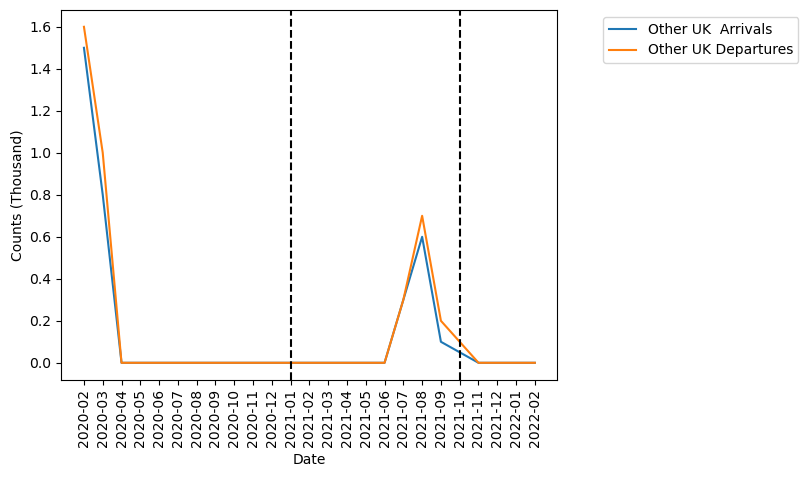

In [19]:
#To visualise the data in the unique conditions
sns.lineplot(x="Date", y='Other UK (1)_Arrivals', data=covid_raws, label='Other UK  Arrivals')
sns.lineplot(x="Date", y='Other UK (1)_Departures', data=covid_raws, label='Other UK Departures')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Counts (Thousand)')

# Rotate the dates vertically
plt.xticks(rotation=90)


# Add dashed vertical lines
plt.axvline('2021-01', color='black', linestyle='--')
plt.axvline('2021-10', color='black', linestyle='--')
#https://stackoverflow.com/questions/34160169/kwargs-for-linestyle-and-linecolour-within-the-axvline-and-axhline-with-matplotl

# Show legend
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1));

# Show the line plot
plt.show()

The researcher choose to interpolate these missing values to maintain the continuity of the dataset.

In [20]:
internationalTour_df['Other UK (1)_Departures'].interpolate(method='linear', direction='forward', inplace=True)

In [21]:
internationalTour_df['Other UK (1)_Arrivals'].interpolate(method='linear', direction='forward',inplace=True)

In [22]:
#No Null values are detected now
internationalTour_df.isnull().sum()

Country_Direction
Date                                                                              0
Month                                                                             0
All countries_Arrivals                                                            0
All countries_Departures                                                          0
Belgium_Arrivals                                                                  0
Belgium_Departures                                                                0
France_Arrivals                                                                   0
France_Departures                                                                 0
Germany_Arrivals                                                                  0
Germany_Departures                                                                0
Great Britain_Arrivals                                                            0
Great Britain_Departures                                  

In [23]:
#Tidy up some columns
#(Great Britain_Arrivals AND Other UK (1)_Arrivals ),
#(Other Europe (34)_Arrivals AND Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals)
internationalTour_df['All Great Britain_Arrivals'] = internationalTour_df['Great Britain_Arrivals'] + internationalTour_df['Other UK (1)_Arrivals']
internationalTour_df['Other Europe_Arrivals'] = internationalTour_df['Other Europe (34)_Arrivals'] + internationalTour_df['Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals']

In [24]:
#Rename All-Countries departure column to keep it for the analysis of the arrivals study 
internationalTour_df.rename(columns={'All countries_Departures': 'Total_Dep'}, inplace=True)

In [25]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 40 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   Month                                                                           169 non-null    object 
 2   All countries_Arrivals                                                          169 non-null    float64
 3   Total_Dep                                                                       169 non-null    float64
 4   Belgium_Arrivals                                                                169 non-null    float64
 5   Belgium_Departures                                                              169 non-null    float64
 6   France_Arrivals   

In [26]:
# Dropping the unnecessary columns
internationalTour_df = drop_it(internationalTour_df, ['Month','Great Britain_Arrivals', 'Other UK (1)_Arrivals',
                                                      'Other Europe (34)_Arrivals',
                                                      'Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)_Arrivals'])

In [27]:
internationalTour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 35 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   All countries_Arrivals                                                          169 non-null    float64
 2   Total_Dep                                                                       169 non-null    float64
 3   Belgium_Arrivals                                                                169 non-null    float64
 4   Belgium_Departures                                                              169 non-null    float64
 5   France_Arrivals                                                                 169 non-null    float64
 6   France_Departures 

## EDA on Air and Sea Travel by Mode dataset
Using the imperative programming paradigm

In [28]:
travelMode_df.head()

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4


In [29]:
travelMode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1014 non-null   object 
 1   Month            1014 non-null   object 
 2   Direction        1014 non-null   object 
 3   Mode             1014 non-null   object 
 4   UNIT             1014 non-null   object 
 5   VALUE            1014 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.7+ KB


In [30]:
travelMode_df.describe()

,VALUE
count,1014.000000
mean,819.083531
std,653.410945
min,4.000000
25%,109.600000
50%,870.300000
75%,1323.825000
max,2270.700000


In [31]:
travelMode_df.describe(include='O')

,STATISTIC Label,Month,Direction,Mode,UNIT
count,1014,1014,1014,1014,1014
unique,1,169,2,3,1
top,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand
freq,1014,6,507,338,1014


#### Dataset Cleaning and Manipulation
The ' Air and Sea Travel by Mode'dataset was checked for null values. No null values were found.

In [32]:
travelMode_df.isnull().sum()

STATISTIC Label    0
Month              0
Direction          0
Mode               0
UNIT               0
VALUE              0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other related datasets by applying of the following functions:

1. Combined column was added to prepare the table to be pivoted using Function_1
2. Pivot operations were performed on the dataset with the 'Month' date serving as the index, using Function_2
3. Date column 'Month' was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and it was ascending sorted to start from   2010-01 to 2024-02 using Function_4
4. the unnessary columns were droped using Function_3

In [33]:
#Combine two columns into one column Using companation function
travelMode_df=combine(travelMode_df,'Mode_Direction', 'Mode', 'Direction')
travelMode_df.head()

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE,Mode_Direction
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2,All modes of transport_Arrivals
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4,Air_Arrivals
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8,Sea_Arrivals
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7,All modes of transport_Departures
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4,Air_Departures


In [34]:
#Using Pivot function 
travelMode_df=pivot_dataset(travelMode_df, 'Mode_Direction', 'VALUE')

In [35]:
#Using date format /sort function
travelMode_df=sort(travelMode_df,'Month')

In [36]:
# Dropping the unnecessary columns
travelMode_df = drop_it(travelMode_df, ['Month','All modes of transport_Arrivals','All modes of transport_Departures'])

In [37]:
travelMode_df.head()

Mode_Direction,Date,Air_Arrivals,Air_Departures,Sea_Arrivals,Sea_Departures
0,2010-01,728.4,732.4,44.8,59.3
1,2010-02,757.2,757.2,46.9,46.1
2,2010-03,906.6,919.6,83.3,81.5
3,2010-04,735.8,709.5,168.7,172.5
4,2010-05,968.5,977.9,146.4,132.9


## EDA for Air and Sea Travel by Route dataset
Using the imperative programming paradigm

In [38]:
travelRoute_df.head()

,STATISTIC Label,Month,Direction,Route,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All routes of travel,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Cross channel,Thousand,362.5
2,Air and Sea Travel,2010 January,Arrivals,Continental Europe,Thousand,344.8
3,Air and Sea Travel,2010 January,Arrivals,Transatlantic,Thousand,51.7
4,Air and Sea Travel,2010 January,Arrivals,Other,Thousand,14.2


In [39]:
travelRoute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1690 non-null   object 
 1   Month            1690 non-null   object 
 2   Direction        1690 non-null   object 
 3   Route            1690 non-null   object 
 4   UNIT             1690 non-null   object 
 5   VALUE            1690 non-null   float64
dtypes: float64(1), object(5)
memory usage: 79.3+ KB


In [40]:
travelRoute_df.describe()

,VALUE
count,1690.000000
mean,491.449941
std,505.845834
min,0.500000
25%,59.625000
50%,387.100000
75%,719.675000
max,2270.700000


In [41]:
travelRoute_df.describe(include='O')

,STATISTIC Label,Month,Direction,Route,UNIT
count,1690,1690,1690,1690,1690
unique,1,169,2,5,1
top,Air and Sea Travel,2010 January,Arrivals,All routes of travel,Thousand
freq,1690,10,845,338,1690


#### Dataset Cleaning and Manipulation
The'Air and Sea Travel by Route'dataset was checked for null values. No null values were found.

In [42]:
travelRoute_df.isnull().sum()

STATISTIC Label    0
Month              0
Direction          0
Route              0
UNIT               0
VALUE              0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other related datasets by applying of the following functions:

1. Combined column was added to prepare the table to be pivoted using Function_1
2. Pivot operations were performed on the dataset with the 'Month' date serving as the index, using Function_2
3. Date column 'Month' was reshaped (from yyyy MonthName -%Y %B- to yyyy-mm -%Y-%m-) and it was ascending sorted to start from   2010-01 to 2024-02 using Function_4
4. The unnessary columns were droped using Function_3

In [43]:
#Combine two columns into one column Using companation function
travelRoute_df=combine(travelRoute_df,'Route_Direction', 'Route', 'Direction')

In [44]:
#Using Pivot function 
travelRoute_df=pivot_dataset(travelRoute_df, 'Route_Direction', 'VALUE')

In [45]:
#Using date format /sort function
travelRoute_df=sort(travelRoute_df,'Month')

In [46]:
# Dropping the unnecessary columns
travelRoute_df = drop_it(travelRoute_df, ['Month','All routes of travel_Arrivals','All routes of travel_Departures'])

In [47]:
travelRoute_df.head()

Route_Direction,Date,Continental Europe_Arrivals,Continental Europe_Departures,Cross channel_Arrivals,Cross channel_Departures,Other_Arrivals,Other_Departures,Transatlantic_Arrivals,Transatlantic_Departures
0,2010-01,344.8,319.0,362.5,408.7,14.2,12.7,51.7,51.3
1,2010-02,330.5,326.2,420.5,423.0,11.4,11.3,41.6,42.7
2,2010-03,394.0,410.0,519.8,511.5,13.0,13.9,63.0,65.7
3,2010-04,373.0,362.0,457.5,451.6,14.4,12.0,59.6,56.3
4,2010-05,502.0,533.1,509.2,478.7,20.6,21.5,83.2,77.5


## EDA for Weather dataset

In [48]:
weather_df.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1941,11,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1
1,1941,12,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1
2,1942,1,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8
3,1942,2,2.9,11.6,-4.3,5.8,0.0,25.8,-10.7,9.0,,51.4
4,1942,3,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9


In [49]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    988 non-null    int64  
 1   month   988 non-null    int64  
 2   meant   988 non-null    float64
 3   maxtp   988 non-null    float64
 4   mintp   988 non-null    float64
 5   mnmax   988 non-null    float64
 6   mnmin   988 non-null    float64
 7   rain    988 non-null    float64
 8   gmin    988 non-null    object 
 9   wdsp    988 non-null    float64
 10  maxgt   988 non-null    object 
 11  sun     988 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 92.8+ KB


In [50]:
weather_df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,wdsp,sun
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1982.500000,6.500000,9.569231,17.779251,0.801619,13.017814,6.121761,63.161134,10.209312,122.014879
std,23.780808,3.461615,3.817279,4.373590,4.068773,4.276936,3.436080,34.386040,2.131297,55.018848
min,1941.000000,1.000000,-0.100000,4.800000,-12.200000,1.900000,-3.500000,3.600000,0.000000,16.400000
25%,1962.000000,3.000000,6.375000,13.900000,-2.200000,9.400000,3.300000,39.175000,8.775000,73.500000
50%,1982.500000,6.500000,9.000000,17.400000,0.300000,12.700000,5.500000,56.950000,10.000000,118.750000
75%,2003.000000,10.000000,13.100000,21.600000,4.200000,17.000000,9.200000,83.225000,11.600000,161.650000
max,2024.000000,12.000000,17.700000,29.100000,10.000000,22.900000,13.600000,217.000000,17.700000,305.900000


In [51]:
weather_df.describe(include='O')

,gmin,maxgt
count,988,988
unique,186,50
top,-6.7,43
freq,19,50


#### Dataset Cleaning and Manipulation
The'weather'dataset was checked for null values. No null values were found.

In [52]:
weather_df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

The dataset is to be reshaped and prepared to be joined to other datasets by applying of the following functions:

1. Combined column was added to join year and month using Function_1
2. Date column 'Month' was reshaped (from yyyy MonthName -%Y_%m- to yyyy-mm -%Y-%m-) and it was ascending sorted
3. The unnessary columns were droped using Function_3

In [53]:
#Combine two columns into one column Using companation function
weather_df=combine(weather_df,'Month', 'year','month')

In [54]:
#Code sourece: https://www.askpython.com/python-modules/pandas/change-datetime-format-in-pandas
# Convert 'Date' column to datetime format & Format the dates as strings in the 'YYYY-MM' format
weather_df['Date'] = pd.to_datetime(weather_df['Month'],format='%Y_%m').dt.strftime('%Y-%m')
# Insert the 'Date' column to the first position in the DataFrame
weather_df.insert(0, 'Date', weather_df.pop('Date'))
# Sort the DataFrame by the 'Date' column
weather_df = weather_df.sort_values(by='Date')
#Reset the index to match the desired output
weather_df.reset_index(drop=True, inplace=True)

In [55]:
# Dropping the unnecessary columns, in this study my intention to foucuse on mean, max and min tempreture, wind speed and sunshine duration
weather_df = drop_it(weather_df, ['Month','mnmax','mnmin','gmin','maxgt','maxtp','mintp'])

In [56]:
weather_df.describe()

,year,month,meant,rain,wdsp,sun
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1982.500000,6.500000,9.569231,63.161134,10.209312,122.014879
std,23.780808,3.461615,3.817279,34.386040,2.131297,55.018848
min,1941.000000,1.000000,-0.100000,3.600000,0.000000,16.400000
25%,1962.000000,3.000000,6.375000,39.175000,8.775000,73.500000
50%,1982.500000,6.500000,9.000000,56.950000,10.000000,118.750000
75%,2003.000000,10.000000,13.100000,83.225000,11.600000,161.650000
max,2024.000000,12.000000,17.700000,217.000000,17.700000,305.900000


## Combine all the datasets

The main aim of this study is to apply machine learning techniques to analyze the arrivals of trips to Ireland.
The following steps were applied to achieve this:
1. The datasets will be merged initially using .join 
2. The arrivals data will be separated from the departures data for further analysis.
3. The columns head  will be renamed
4. EDA will be applied on the resulting dataset

In [57]:
#using join https://realpython.com/pandas-merge-join-and-concat/
#List of DataFrames
dfs = [internationalTour_df, travelMode_df, travelRoute_df, weather_df]

#Set the index of each DataFrame to the date column
for df in dfs:
    df.set_index('Date', inplace=True)

#Merge the DataFrames based on the date column
caseStudy_df = dfs[0]  # Initialize with the first DataFrame chatGPT was used to identfy this problem
for df in dfs[1:]:
    caseStudy_df = caseStudy_df.join(df, how='inner', lsuffix='_merged', rsuffix='_new')

# Reset the index 'date_column' to be set as a regular column
caseStudy_df.reset_index(inplace=True)

In [58]:
caseStudy_df.shape

(169, 53)

In [59]:
caseStudy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 53 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Date                                                                            169 non-null    object 
 1   All countries_Arrivals                                                          169 non-null    float64
 2   Total_Dep                                                                       169 non-null    float64
 3   Belgium_Arrivals                                                                169 non-null    float64
 4   Belgium_Departures                                                              169 non-null    float64
 5   France_Arrivals                                                                 169 non-null    float64
 6   France_Departures 

#### Separate the DataFrame to Departures and Arrivals  
This case study will focus on the **Arrivals Data**, the compined DataFrame was divided into Departures and Arrivals sub-datasets, to be consider it for future analysis
It was suggested by the data scientist to include the total departures count in later stages of this analysis to gain further insights into the study. Therefore, the total departures column were included.- this was the reason to change the name in cell num.(24)

In [60]:
#Empty list to store columns with 'Departures'
departure_columns = []

#Form a loop to read each column in the DataFrame
for column in caseStudy_df.columns:
    #If the column name contains 'Departures'
    if 'Departures' in column:
        # Append the column name to the departure_columns list
        departure_columns.append(column)

# Create a new DataFrame with columns containing 'Departures'
departures_df = caseStudy_df[departure_columns]

# Create Arrivals DataFrame 
arrivalsFull_df = caseStudy_df.drop(columns=departure_columns)

In [61]:
arrivalsFull_df

,Date,All countries_Arrivals,Total_Dep,Belgium_Arrivals,France_Arrivals,Germany_Arrivals,Italy_Arrivals,Netherlands_Arrivals,Other Countries(42)_Arrivals,Other Transatlantic Countries(1)_Arrivals,Poland_Arrivals,Portugal_Arrivals,Spain_Arrivals,Switzerland_Arrivals,United Arab Emirates_Arrivals,United States_Arrivals,All Great Britain_Arrivals,Other Europe_Arrivals,Air_Arrivals,Sea_Arrivals,Continental Europe_Arrivals,Cross channel_Arrivals,Other_Arrivals,Transatlantic_Arrivals,year,month,meant,rain,wdsp,sun
0,2010-01,773.2,791.7,12.5,48.9,45.3,24.6,24.0,6.6,0.0,43.2,8.0,68.6,12.3,7.6,51.7,362.4,57.5,728.4,44.8,344.8,362.5,14.2,51.7,2010,1,1.7,45.2,11.0,86.3
1,2010-02,804.0,803.2,14.3,49.1,43.9,26.5,23.8,4.9,0.1,35.8,7.7,65.9,12.0,6.5,41.5,420.6,51.5,757.2,46.9,330.5,420.5,11.4,41.6,2010,2,2.3,36.7,8.4,64.1
2,2010-03,989.8,1001.1,16.3,59.3,56.9,30.7,28.0,5.4,0.0,39.5,9.5,81.0,13.3,7.6,63.0,519.8,59.4,906.6,83.3,394.0,519.8,13.0,63.0,2010,3,4.9,54.8,9.3,155.1
3,2010-04,904.5,882.0,10.2,74.4,44.4,30.2,22.4,6.0,0.3,33.6,18.3,81.1,8.6,8.4,59.4,457.4,49.8,735.8,168.7,373.0,457.5,14.4,59.6,2010,4,7.7,26.7,8.4,193.3
4,2010-05,1114.9,1110.8,12.2,87.5,59.1,38.9,27.7,12.3,4.2,41.8,30.9,125.7,10.1,8.3,79.0,509.2,68.0,968.5,146.4,502.0,509.2,20.6,83.2,2010,5,9.6,38.0,8.2,234.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2023-09,1913.5,1910.1,21.2,145.3,93.5,103.9,62.2,47.7,34.9,40.5,89.4,286.5,24.2,29.1,189.1,572.1,173.9,1814.8,98.7,1040.5,572.2,76.9,223.9,2023,9,14.5,134.0,8.0,150.2
165,2023-10,1818.6,1829.7,21.8,133.7,91.6,97.0,62.6,39.7,21.3,45.4,83.2,275.8,22.7,23.1,148.9,596.0,155.9,1742.1,76.5,989.7,596.0,62.7,170.2,2023,10,11.3,125.7,7.8,105.2
166,2023-11,1397.4,1361.5,21.3,71.4,68.0,55.8,62.5,33.5,10.0,40.8,42.6,178.7,14.2,26.1,120.8,540.3,111.3,1352.8,44.5,666.6,540.3,59.7,130.9,2023,11,7.3,65.1,9.3,77.2
167,2023-12,1433.6,1484.9,22.7,75.1,72.0,48.1,60.7,31.1,10.9,43.1,32.5,142.1,19.3,27.2,124.4,603.7,120.9,1362.3,71.3,636.4,603.7,58.3,135.2,2023,12,7.5,68.5,12.1,54.9


In [62]:
#Rename the columns Names
arrivalsFull_df.rename(columns = {'Date':'Date','All countries_Arrivals':'Total_Arrivals(Thousand)',
                                  'Continental Europe_Arrivals':'Continental_Eur_Rute_A(Thousand)',
                                  'Cross channel_Arrivals':'Cross_channel_Rute_A(Thousand)',
                                  'Other_Arrivals':'Other_Rute_A(Thousand)','Total_Dep':'Total_Departure(Thousand)',
                                  'Transatlantic_Arrivals':'Transatlantic_Rute_A(Thousand)',
                                  'meant':'Mean_Air_Temperature(C)','rain':'Precipitation_Amount(mm)',
                                  'wdsp':'Mean_Wind_Speed(knot)','sun':'Sunshine_duration(hours)'}, inplace = True)

In [63]:
arrivalsFull_df.columns

Index(['Date', 'Total_Arrivals(Thousand)', 'Total_Departure(Thousand)',
       'Belgium_Arrivals', 'France_Arrivals', 'Germany_Arrivals',
       'Italy_Arrivals', 'Netherlands_Arrivals',
       'Other Countries(42)_Arrivals',
       'Other Transatlantic Countries(1)_Arrivals', 'Poland_Arrivals',
       'Portugal_Arrivals', 'Spain_Arrivals', 'Switzerland_Arrivals',
       'United Arab Emirates_Arrivals', 'United States_Arrivals',
       'All Great Britain_Arrivals', 'Other Europe_Arrivals', 'Air_Arrivals',
       'Sea_Arrivals', 'Continental_Eur_Rute_A(Thousand)',
       'Cross_channel_Rute_A(Thousand)', 'Other_Rute_A(Thousand)',
       'Transatlantic_Rute_A(Thousand)', 'year', 'month',
       'Mean_Air_Temperature(C)', 'Precipitation_Amount(mm)',
       'Mean_Wind_Speed(knot)', 'Sunshine_duration(hours)'],
      dtype='object')

In [64]:
#The mean features were kept
arrivals_df=arrivalsFull_df[['Date', 'Total_Arrivals(Thousand)', 'Total_Departure(Thousand)','Air_Arrivals',
                             'Sea_Arrivals', 'Continental_Eur_Rute_A(Thousand)','Cross_channel_Rute_A(Thousand)', 
                             'Other_Rute_A(Thousand)','Transatlantic_Rute_A(Thousand)', 'year', 'month',
                             'Mean_Air_Temperature(C)', 'Precipitation_Amount(mm)','Mean_Wind_Speed(knot)', 
                             'Sunshine_duration(hours)']]

### EDA on the resulting Dataset

In [65]:
arrivals_df.head()

((169, 15),
       Date  Total_Arrivals(Thousand)  Total_Departure(Thousand)  Air_Arrivals  \
 0  2010-01                     773.2                      791.7         728.4   
 1  2010-02                     804.0                      803.2         757.2   
 2  2010-03                     989.8                     1001.1         906.6   
 3  2010-04                     904.5                      882.0         735.8   
 4  2010-05                    1114.9                     1110.8         968.5   
 
    Sea_Arrivals  Continental_Eur_Rute_A(Thousand)  \
 0          44.8                             344.8   
 1          46.9                             330.5   
 2          83.3                             394.0   
 3         168.7                             373.0   
 4         146.4                             502.0   
 
    Cross_channel_Rute_A(Thousand)  Other_Rute_A(Thousand)  \
 0                           362.5                    14.2   
 1                           420.5          

In [66]:
arrivals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              169 non-null    object 
 1   Total_Arrivals(Thousand)          169 non-null    float64
 2   Total_Departure(Thousand)         169 non-null    float64
 3   Air_Arrivals                      169 non-null    float64
 4   Sea_Arrivals                      169 non-null    float64
 5   Continental_Eur_Rute_A(Thousand)  169 non-null    float64
 6   Cross_channel_Rute_A(Thousand)    169 non-null    float64
 7   Other_Rute_A(Thousand)            169 non-null    float64
 8   Transatlantic_Rute_A(Thousand)    169 non-null    float64
 9   year                              169 non-null    int64  
 10  month                             169 non-null    int64  
 11  Mean_Air_Temperature(C)           169 non-null    float64
 12  Precipit

## Descriptive Statiscs and Plots: 

In [67]:
arrivals_df.describe()

,Total_Arrivals(Thousand),Total_Departure(Thousand),Air_Arrivals,Sea_Arrivals,Continental_Eur_Rute_A(Thousand),Cross_channel_Rute_A(Thousand),Other_Rute_A(Thousand),Transatlantic_Rute_A(Thousand),year,month,Mean_Air_Temperature(C),Precipitation_Amount(mm),Mean_Wind_Speed(knot),Sunshine_duration(hours)
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.00000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1227.497041,1229.757396,1129.835503,97.657988,577.139645,503.81716,36.406509,110.129586,2016.544379,6.467456,9.598225,64.481065,10.095858,125.449112
std,518.133699,516.408800,474.693749,63.111201,267.351749,188.35303,18.228572,66.014084,4.072203,3.477882,3.897503,35.847649,1.921878,53.310163
min,16.100000,17.800000,12.100000,4.000000,3.500000,9.30000,2.000000,1.200000,2010.000000,1.000000,-0.100000,4.800000,6.500000,30.500000
25%,911.400000,895.100000,846.000000,48.900000,389.200000,455.10000,23.700000,62.900000,2013.000000,3.000000,6.200000,39.700000,8.800000,79.700000
50%,1236.600000,1256.400000,1171.700000,87.600000,571.100000,531.30000,37.700000,101.300000,2017.000000,6.000000,9.100000,57.700000,9.600000,121.000000
75%,1576.000000,1577.600000,1450.300000,122.500000,759.000000,621.90000,47.800000,153.700000,2020.000000,9.000000,13.100000,83.500000,11.000000,159.800000
max,2270.700000,2194.300000,2070.200000,279.500000,1168.100000,814.80000,85.400000,254.400000,2024.000000,12.000000,16.700000,193.500000,16.300000,295.000000


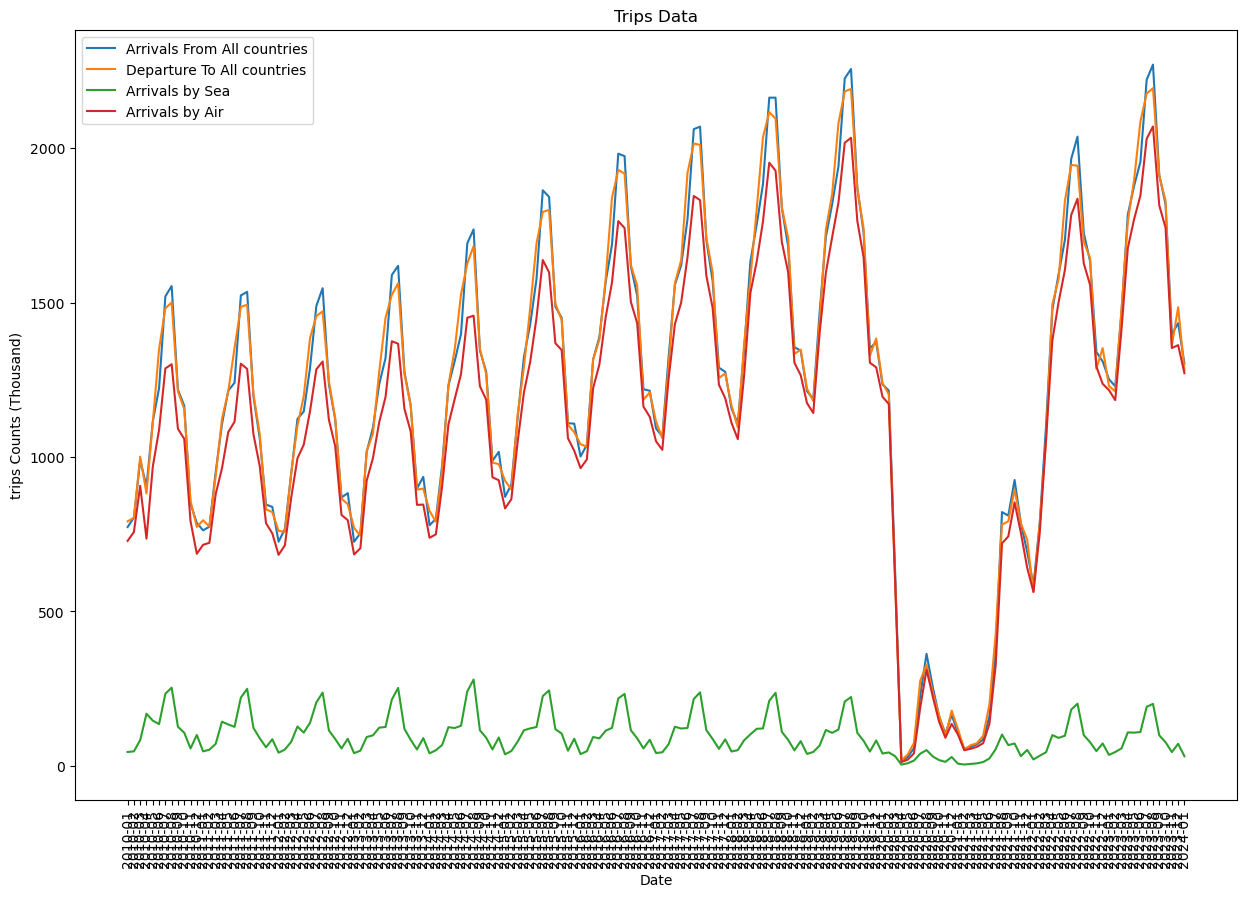

In [68]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Date", y='Total_Arrivals(Thousand)', data=arrivals_df, label='Arrivals From All countries')
sns.lineplot(x="Date", y='Total_Departure(Thousand)', data=arrivals_df, label='Departure To All countries')
sns.lineplot(x="Date", y='Sea_Arrivals', data=arrivals_df, label='Arrivals by Sea')
sns.lineplot(x="Date", y='Air_Arrivals', data=arrivals_df, label='Arrivals by Air')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('trips Counts (Thousand)')
plt.title('Trips Data')

# Rotate the dates vertically
plt.xticks(rotation=90)

# Show legend
plt.legend()

# Show the line plot
plt.show()


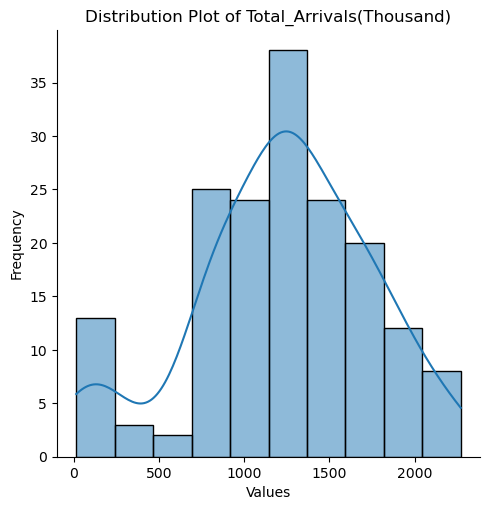

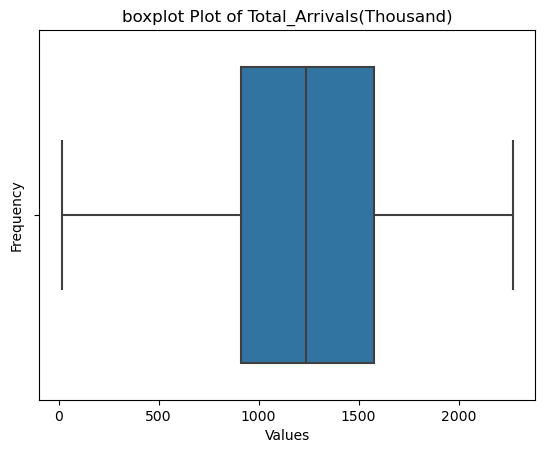

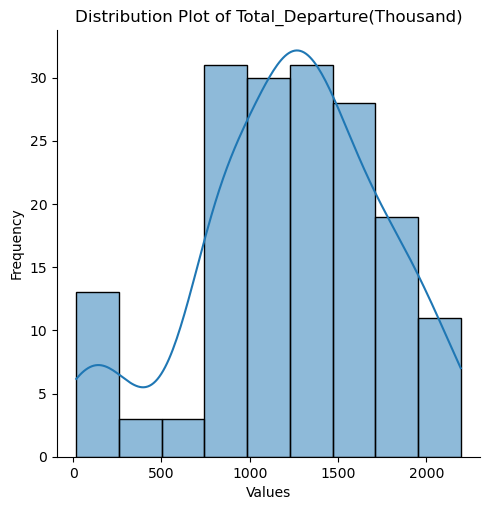

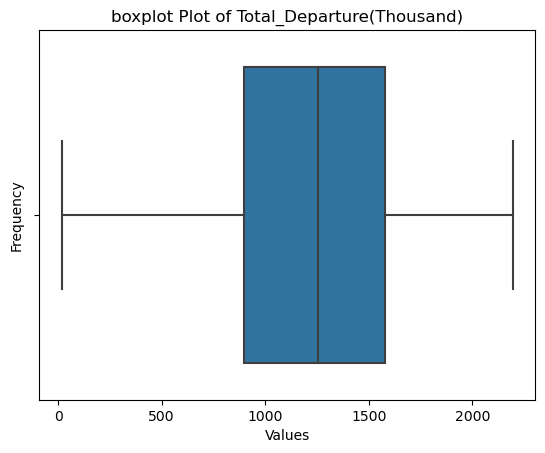

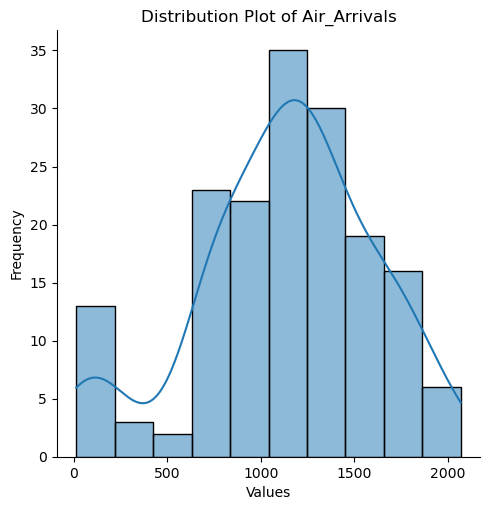

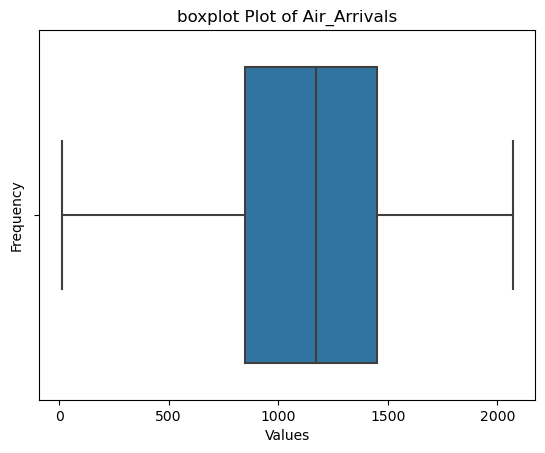

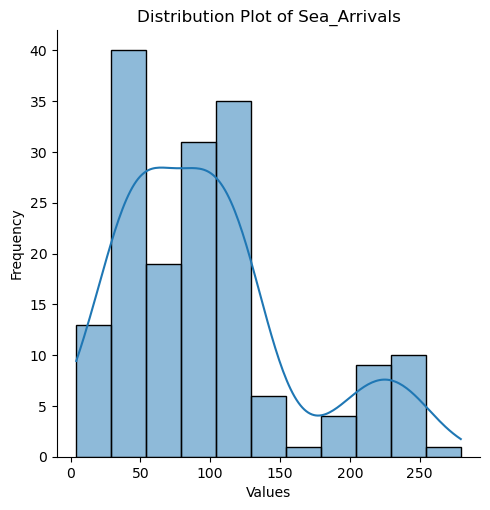

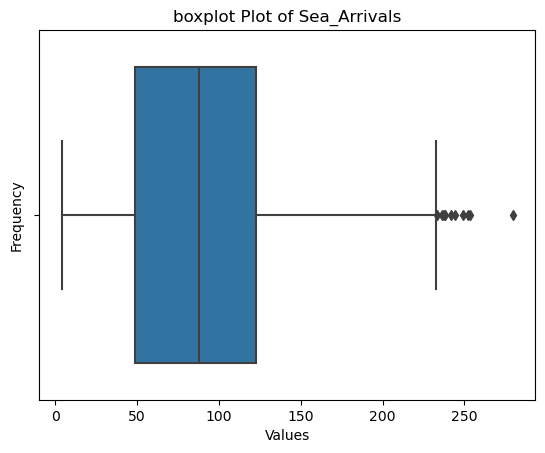

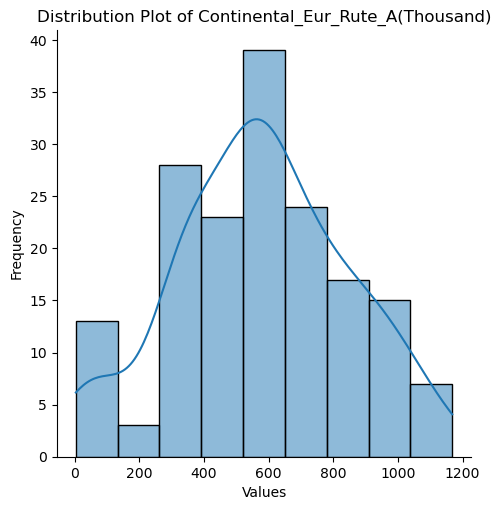

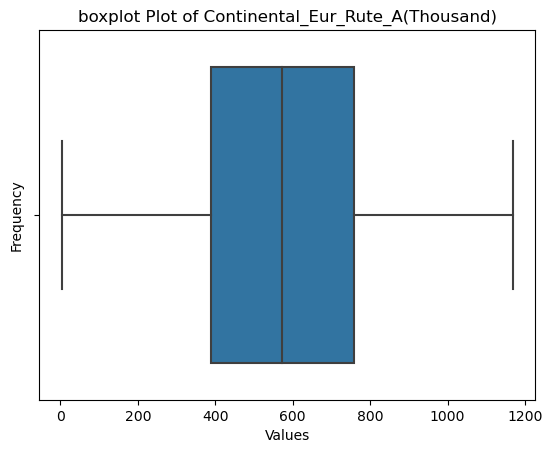

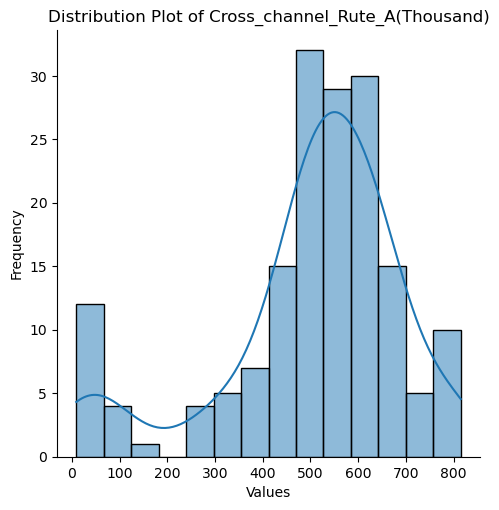

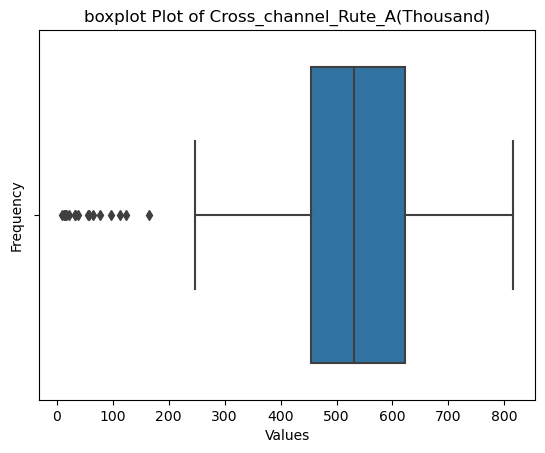

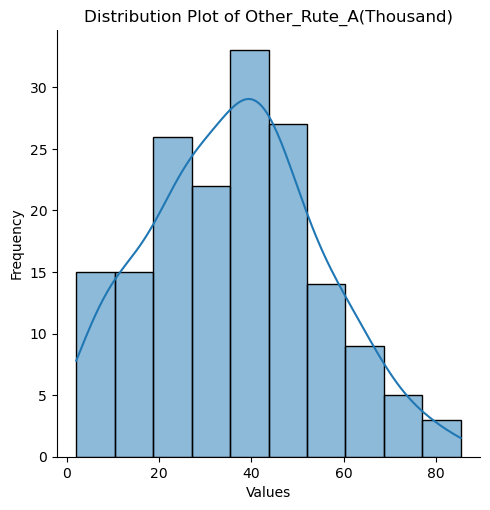

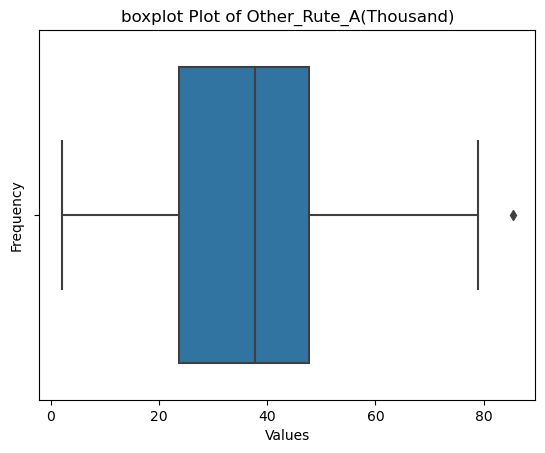

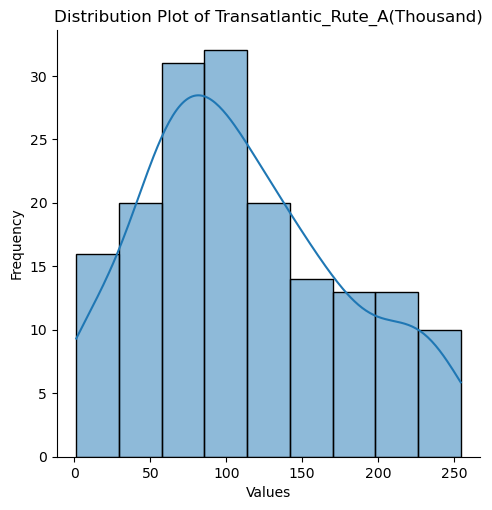

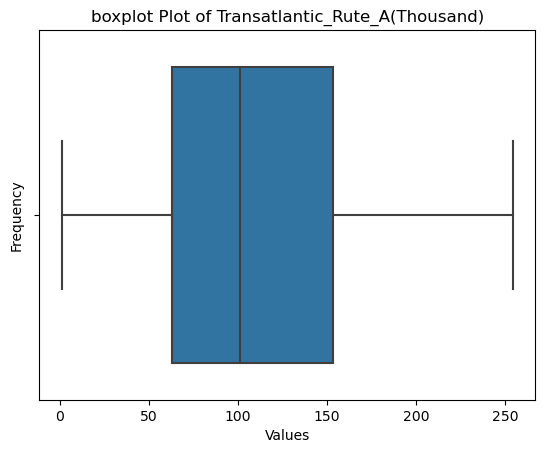

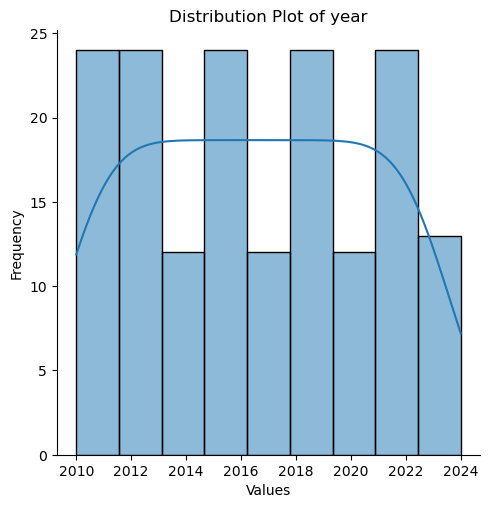

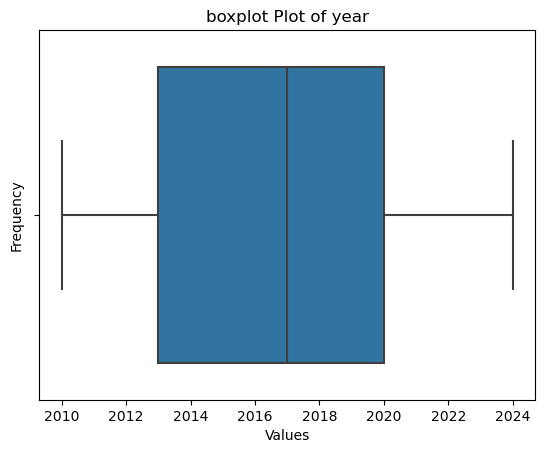

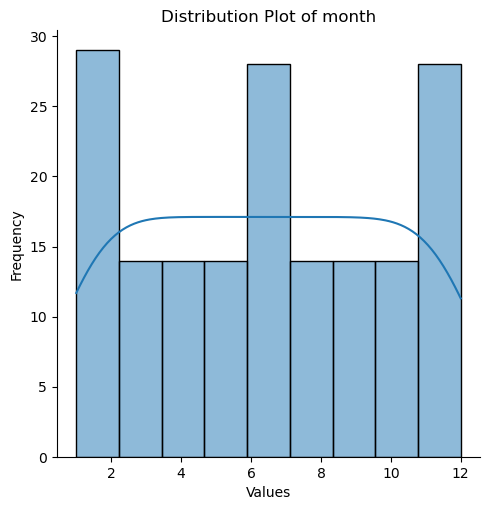

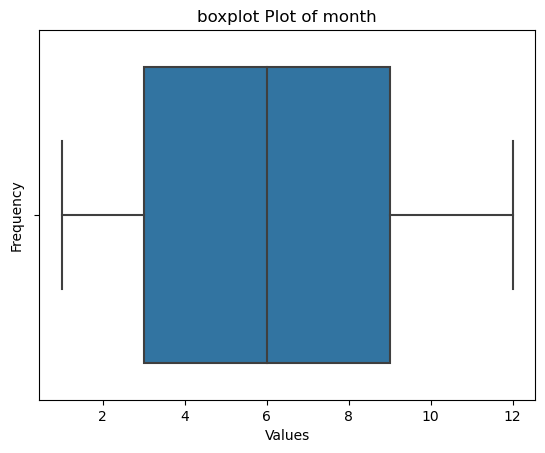

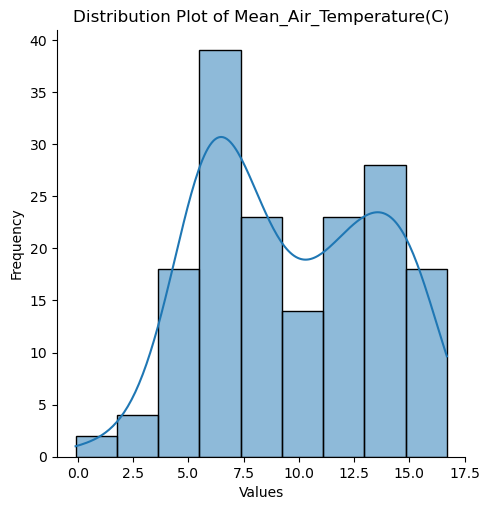

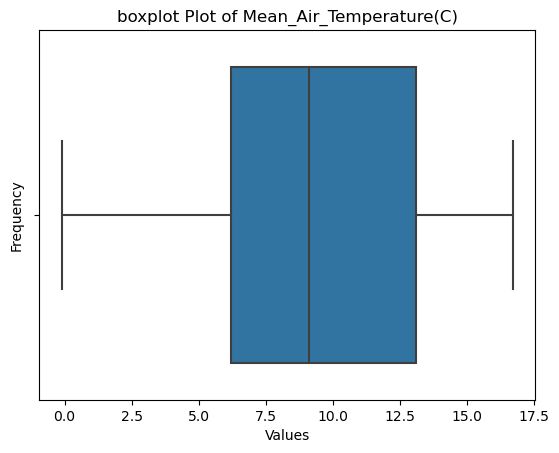

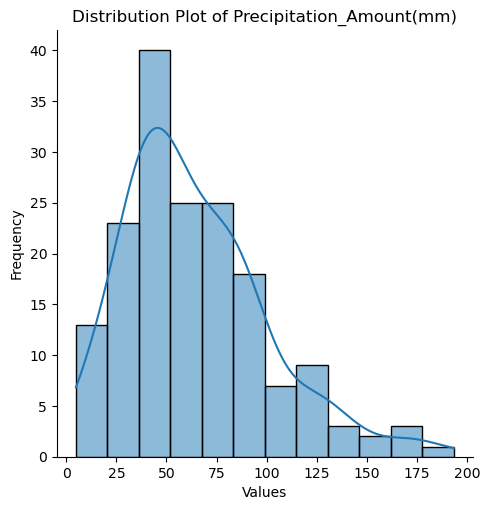

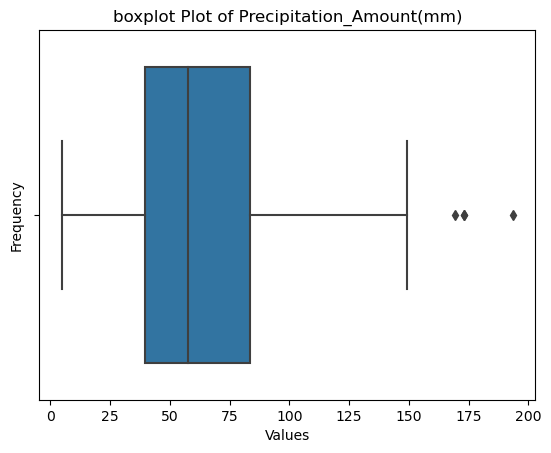

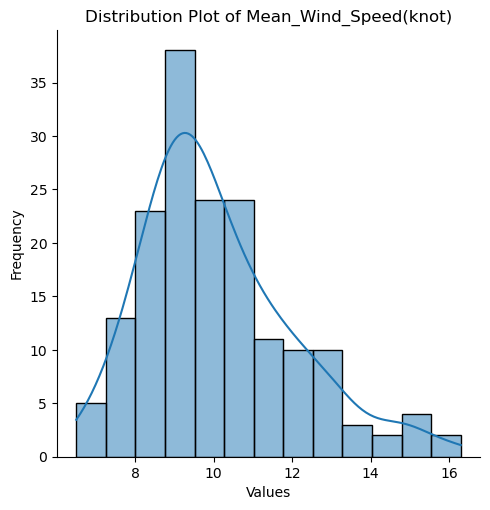

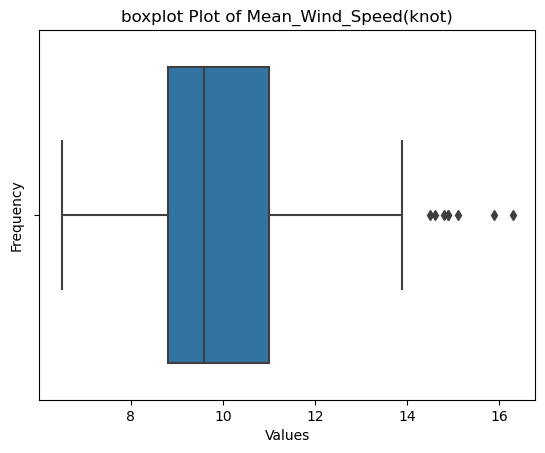

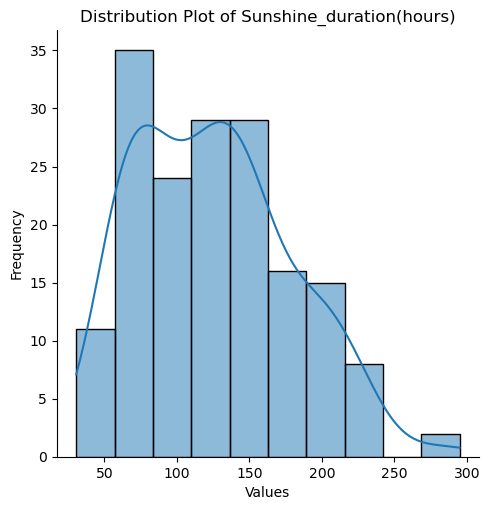

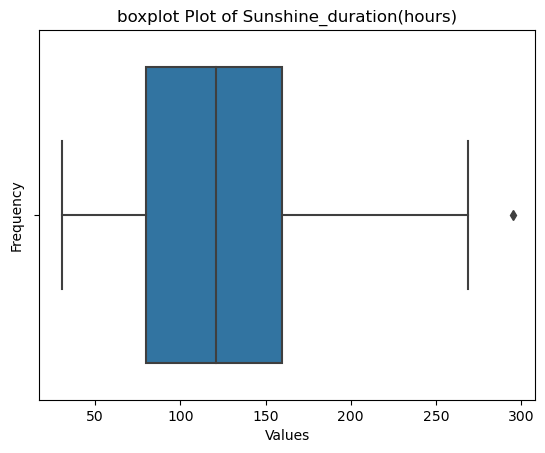

In [69]:
#making anew df containing numerical columns only to plot the distripution and boxplot for each numerical feature 
numerical_columns = arrivals_df.select_dtypes(include=['int', 'float']).columns

#Loop through each numerical column
for column in numerical_columns:
    # Create a distplot for the current column
    sns.displot(data=arrivals_df, x=column, kde=True)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column}')
    plt.show();

    sns.boxplot(data=arrivals_df, x=column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'boxplot Plot of {column}')

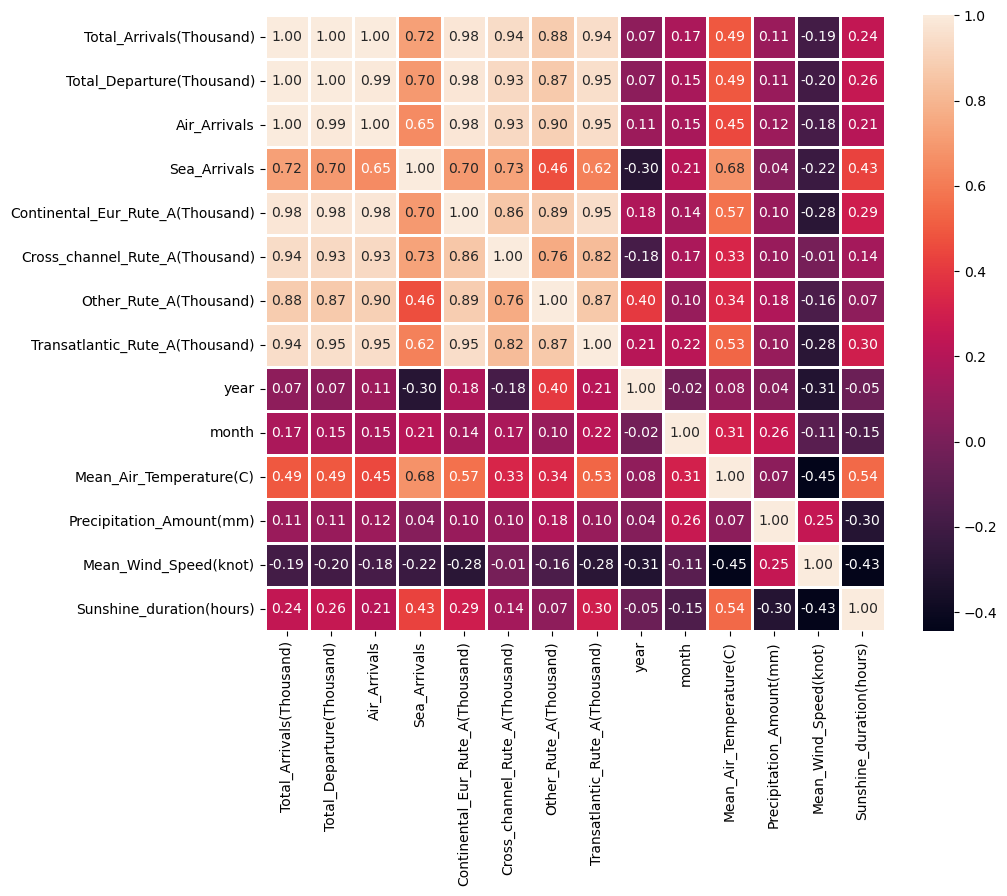

In [70]:
#Code utilized from ML Week 1 Toutorial_1
#to plot a heatmap to show corolation beteween the dataset features 
numeric_df = arrivals_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot = True, fmt = '.2f', linewidths =2);
plt.show()

In [71]:
#Refrance: https://stackoverflow.com/questions/59295095/how-do-i-save-data-in-pythonpandas
#Save the reselt dataset
#arrivals_df.to_csv('CA1_Arrivals.csv')
#arrivalsFull_df.to_csv('CA1_ArrivalsFull.csv')

### Statistics Distripution Case Studies
In this section some statistical case studies were taken in consederation based on the arrival dataset
1. Import the scipy.stats Libraries
2. Apply the case studies on Binomial, Poission and Normal Distrebutions

In [72]:
#Import the libraries
from scipy.stats import binom #BINOMIAL DISTRIBUTION
from scipy.stats import poisson as po #POISSON DISTRIBUTION
from scipy.stats import norm #NORMAL DISTRIBUTION

#### BINOMIAL DISTRIBUTION

In [73]:
#The probability of arrivals by Air 
prob_Air=arrivals_df['Air_Arrivals'].sum()/arrivals_df['Total_Arrivals(Thousand)'].sum()
prob_Air

0.9204384734414092

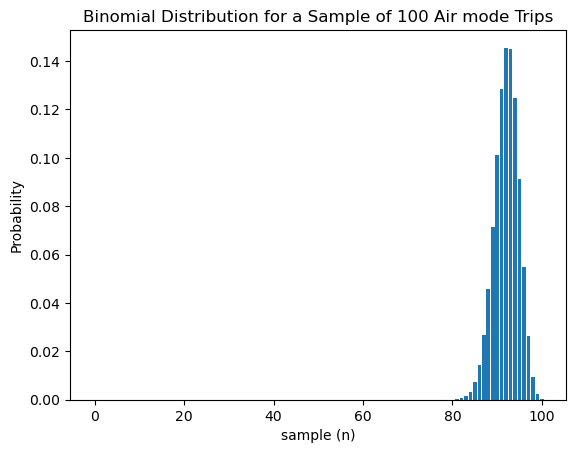

In [74]:
#Code Source:https://www.geeksforgeeks.org/python-binomial-distribution
#For a samle of 100 travellers
n = 100
p = prob_Air
# defining the list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.bar(r_values, dist) 

# Add axis titles
plt.xlabel('sample (n)')
plt.ylabel('Probability')
plt.title('Binomial Distribution for a Sample of 100 Air mode Trips')

plt.show()


Probabilityto find exactly 90 traveles out of 100 came by Air=  0.10112641649275803


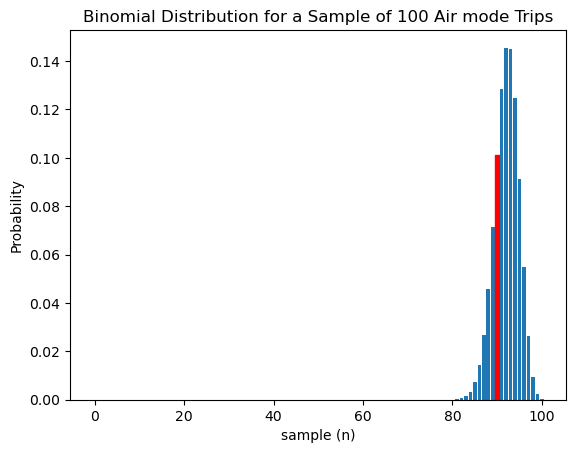

In [75]:
#To calcuate the propapility to find exactly 90 traveles out of 100 came by Air while the probability = prob_Air (0.92)
#Probability mass function at k=90 was calculated to 
air_90=binom.pmf(k = 90, n = 100, p =prob_Air)
print('Probabilityto find exactly 90 traveles out of 100 came by Air= ',air_90)

#Plotting the graph using matplotlib.pyplot.bar() function to plot vertical bars
n = 100
p = prob_Air
# defining the list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
bars=plt.bar(r_values, dist) 

# Add axis titles
plt.xlabel('sample (n)')
plt.ylabel('Probability')
plt.title('Binomial Distribution for a Sample of 100 Air mode Trips')

# Highlight the bar at y=90 in red
bars[90].set_color('red')


plt.show()

Probability of arriving by Sea=  0.07956152655859083
Probability of more than 10 traveles out of 100 came by sea=  0.1713038880506953


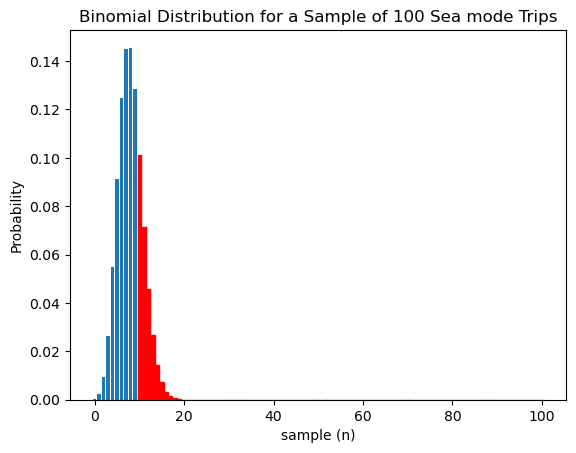

In [76]:
# to calculate if MORE than 10 out of 100 did NOT come By Air (came by Sea)
prob_Sea=1-prob_Air
print('Probability of arriving by Sea= ',prob_Sea)

#Survival function was used to calculate the sum of propapility for more than 10 out 100 came by sea: 
sea_10=binom.sf(k = 10, n = 100, p = prob_Sea)
print('Probability of more than 10 traveles out of 100 came by sea= ',sea_10)

#Plotting the graph using matplotlib.pyplot.bar() function to plot vertical bars
n = 100
p = prob_Sea
# defining the list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
bars=plt.bar(r_values, dist) 

# Add axis titles
plt.xlabel('sample (n)')
plt.ylabel('Probability')
plt.title('Binomial Distribution for a Sample of 100 Sea mode Trips')

# Highlight the bars from index 10 to the end in red
for i in range(10, len(bars)):
    bars[i].set_color('red')

plt.show()

#### POISSON DISTRIBUTION

In [77]:
# Define the Poisson distribution parameters 
#Calculate the Average of arrivals by cross chanel route on Januaray from 2010 till 2020 (lamda)
#Filter the dataset for January from 2010 to 2020
lamda = arrivals_df[(arrivals_df['month'] == 1) & 
                    (arrivals_df['year'].between(2010, 2020))]['Cross_channel_Rute_A(Thousand)'].mean()

print("mean of Arrivals by Cross Channel Rute in January from 2010 to 2020:", lamda)

mean of Arrivals by Cross Channel Rute in January from 2010 to 2020: 416.98181818181814


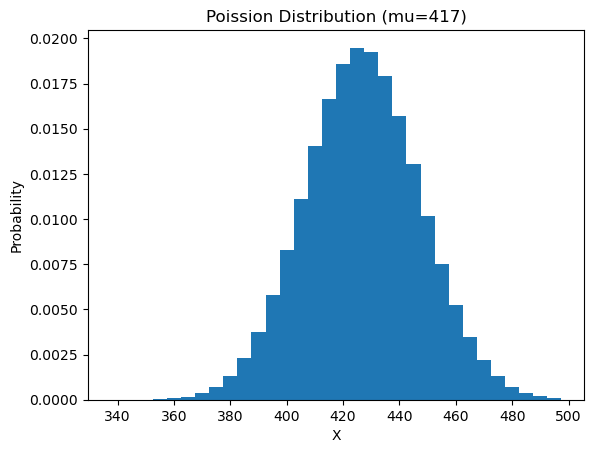

In [78]:
#Code Source: https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/

#creating a numpy array for x-axis
x = np.arange(340, 500, 5)
 
# poisson distribution data for y-axis
y = po.pmf(x, mu=lamda, loc=10)
 
#Plot the graph
plt.bar(x, y, width=5,align='center')

# Add axis titles
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Poission Distribution (mu=417)')
 
# showing the graph
plt.show()

In [79]:
#to calculate what between 380 and 420 ,the cumulative probability for k <= 419 and k >= 379 will be calculated 
#Calculate the cumulative probability between 380 and 420
k_Between_380_420 = po.cdf(k=419, mu=lamda) - po.cdf(k=379, mu=lamda)

print("Cumulative probability between 380 and 420:", k_Between_380_420)

Cumulative probability between 380 and 420: 0.5205117437358533


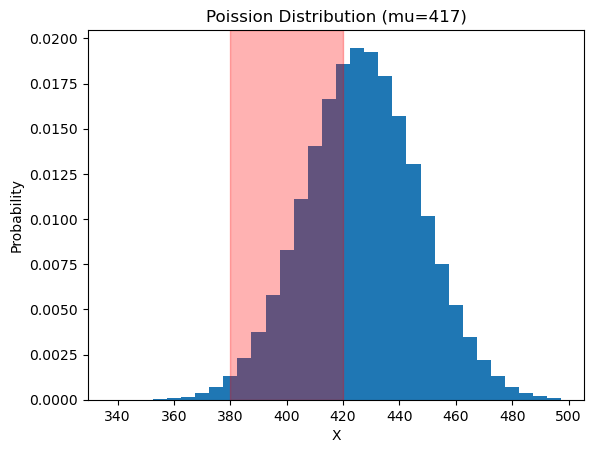

In [80]:
#Code Source: https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/

#creating a numpy array for x-axis
x = np.arange(340, 500, 5)
 
# poisson distribution data for y-axis
y = po.pmf(x, mu=lamda, loc=10)
 
#Plot the graph
plt.bar(x, y, width=5,align='center')
 
#Code Source: eeksforgeeks.org/matplotlib-pyplot-axvspan-in-python/
# Highlight the area between 380 and 420 in red
plt.axvspan(380, 420, color='red', alpha=0.3)

# Add axis titles
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Poission Distribution (mu=417)')
    
# showing the graph
plt.show()

#### NORMAL DISTRIBUTION  (Central Limit Theorem)
* Code Source: Statistics Class 25th Mar - central limit theorem

In [81]:
#Calculate the All countries(Thousand) mean
mean=arrivals_df['Total_Arrivals(Thousand)'].mean()
mean

1227.4970414201184

In [82]:
#Random Samples and Calculate Sample Means
sample_sizes = [10,50,80,100]
sample_means = {size: [arrivals_df['Total_Arrivals(Thousand)'].sample(size).mean() for _ in range(1000)] for size in sample_sizes}

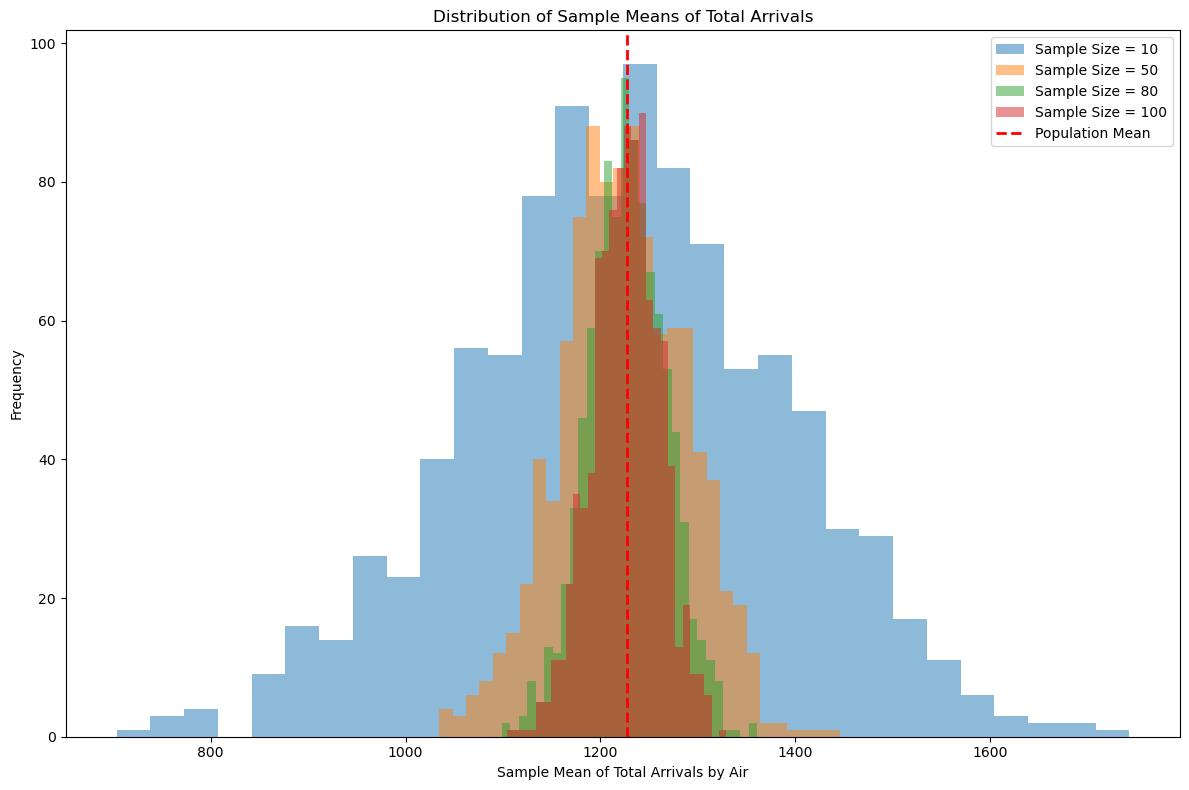

In [83]:
#Visualise the Sampling Distribution

plt.figure(figsize=(12, 8))

for size, means in sample_means.items():
    plt.hist(means, bins=30, alpha=0.5, label=f'Sample Size = {size}')

plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Distribution of Sample Means of Total Arrivals')
plt.xlabel('Sample Mean of Total Arrivals by Air')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Machine learning
#### Part of this section will be to prepare the dataset for the ML models (Random Forest Regressor(RFR), Support Vector Machine Regressor(SVR)  . and Ridge Regressor):
 1. Import the Sklearn Libraries 
 2. Split the data 
 3. Use RobustScaler due to the non-normal distripution and the outliers for most of the features
 **This step it's not required for Random Forest model but it will be for the other models used in this project,therefore the scaled data were used
#### The following steps will be cosidered for RFR  ML models in this study:
 1. Apply the basic Model
 2. Identify if feature importance will have an impact on the RFR performance
 2. Apply the algorrathem with the important features for RFRF
 3. Cross Validation for the basic model
 
#### SVR and Ridge Regressor also were examined for this analysis:
1. Apply the basic model
2. Hyperparameter tuning

In [84]:
#Call Sklearn Libraries 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler

from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import (cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.model_selection import RandomizedSearchCV

from sklearn.inspection import permutation_importance

In [85]:
#Converting 'Date' column type to datetime
arrivals_df['Date'] = pd.to_datetime(arrivals_df['Date'])

#Set 'Date' column as the index
arrivals_df.set_index('Date', inplace=True)

# Display first five records
arrivals_df.head()

,Total_Arrivals(Thousand),Total_Departure(Thousand),Air_Arrivals,Sea_Arrivals,Continental_Eur_Rute_A(Thousand),Cross_channel_Rute_A(Thousand),Other_Rute_A(Thousand),Transatlantic_Rute_A(Thousand),year,month,Mean_Air_Temperature(C),Precipitation_Amount(mm),Mean_Wind_Speed(knot),Sunshine_duration(hours)
Date,,,,,,,,,,,,,,
2010-01-01,773.2,791.7,728.4,44.8,344.8,362.5,14.2,51.7,2010,1,1.7,45.2,11.0,86.3
2010-02-01,804.0,803.2,757.2,46.9,330.5,420.5,11.4,41.6,2010,2,2.3,36.7,8.4,64.1
2010-03-01,989.8,1001.1,906.6,83.3,394.0,519.8,13.0,63.0,2010,3,4.9,54.8,9.3,155.1
2010-04-01,904.5,882.0,735.8,168.7,373.0,457.5,14.4,59.6,2010,4,7.7,26.7,8.4,193.3
2010-05-01,1114.9,1110.8,968.5,146.4,502.0,509.2,20.6,83.2,2010,5,9.6,38.0,8.2,234.7


#### Feature Scaling

In [86]:
#Apply the RobustScaler, robust scaler was used 
sc = RobustScaler()
df_scale=pd.DataFrame(sc.fit_transform(arrivals_df),columns=arrivals_df.columns)

#### Feature Selection & Splitting the Data 

In [87]:
# split dataset in features and target variable
X = df_scale.drop('Total_Arrivals(Thousand)', axis=1)
y = df_scale['Total_Arrivals(Thousand)']

#Splitting the dataset into the Training set and Test set
#Apply train_test_split function that 80% of the data are training data and 20% testing with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Building Random Forest Regression Model
Given the data Distripution and the outliers Random Forest Regression model was used as it is robust to outliers due to its ensemble nature
* Code Sourse:https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [88]:
forest_model = RandomForestRegressor(n_estimators=200, random_state=0)
forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

####  Evaluating Model
Random Forest Regressor Model was evaluated using R-squared for training set and testing set, Root mean squared error of the prediction, and Mean absolute percentage error of the prediction
* Code Source: Totorial 3 ML week 3 class

In [89]:
#Predictions 
y_pred = forest_model.predict(X_test)
y_train_pred=forest_model.predict(X_train)
 
#codesource: Totorial 2 MLWeeK2 class
print("R-squared of the model in training set is: {}".format(forest_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

R-squared of the model in training set is: 0.9992949150888747
-----Test set statistics-----
R-squared of the model in test set is: 0.9921561306323602
Root mean squared error of the prediction is: 0.055388879517696415
Mean absolute percentage error of the prediction is: 21.620232082279355


#### Finding Important Features in Scikit-learn
1. use the feature importance variable to see feature importance scores.
2. visualize these scores using the seaborn library.
* Code Source: Totorial_2 ML Week2 Class 

In [90]:
feature_imp = pd.Series(forest_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Total_Departure(Thousand)           0.415991
Air_Arrivals                        0.341606
Transatlantic_Rute_A(Thousand)      0.095379
Continental_Eur_Rute_A(Thousand)    0.078000
Other_Rute_A(Thousand)              0.035426
Cross_channel_Rute_A(Thousand)      0.026650
Mean_Air_Temperature(C)             0.003107
Sea_Arrivals                        0.002414
Sunshine_duration(hours)            0.000351
Mean_Wind_Speed(knot)               0.000335
Precipitation_Amount(mm)            0.000282
month                               0.000231
year                                0.000228
dtype: float64

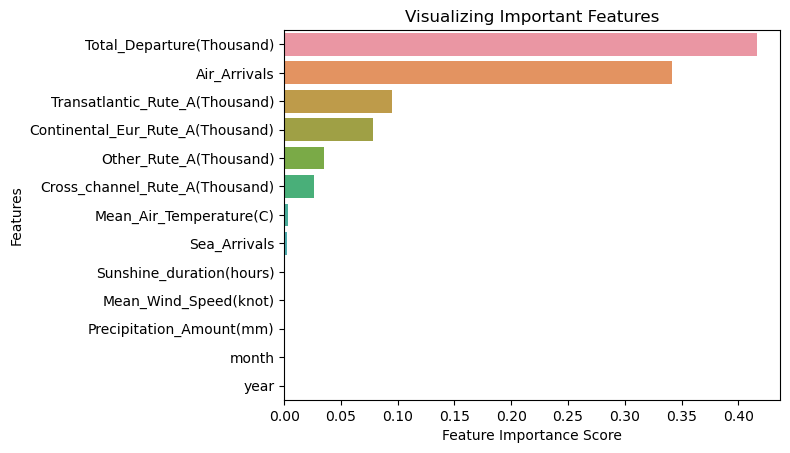

In [91]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

Althought the performance of the Base Random Forest Regressor model is high, its recomended to use analyzing feature importance can help choose which features to include, removing less important features can make the model simpler, easier to understand, and less resource-intensive to train and use.
in this step only the first 7 features were selected 

In [92]:
# Access the most 7 important features
top_7_features = feature_imp.index[:7] # Get the indices of the top 7 most important features

# Extract the top 7 features from the training and testing sets
X_train_top = X_train[top_7_features]
X_test_top = X_test[top_7_features]

# Train the Random Forest model using only the top 7 features
forest_model_top = RandomForestRegressor(n_estimators=200, random_state=0)
forest_model_top.fit(X_train_top, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [93]:
#Predictions 
y_pred_top = forest_model_top.predict(X_test_top)
y_train_pred_Top=forest_model_top.predict(X_train_top)
 
#codesource: Totorial 2 MLWeeK2 class
print("R-squared of the model in training set is: {}".format(forest_model_top.score(X_train_top, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_model_top.score(X_test_top, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred_top)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_top) / y_test)) * 100))

R-squared of the model in training set is: 0.9993460882898371
-----Test set statistics-----
R-squared of the model in test set is: 0.9931141269407507
Root mean squared error of the prediction is: 0.05189636144815242
Mean absolute percentage error of the prediction is: 25.032731123683828


#### Hyperparameter-Tuning
Hyperparameter tuning is the process of optimizing the settings of a machine learning model to achieve the best performance
The performance has been slightly improved.

In the following procedural programming paradigm  was used to compact the diferent parameters and the into one cellto perform a specific function.

In the following cells the RFR was fine-tuned using RandomizedSearchCV:
Code Source:https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_rfr = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid_rfr)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid_rfr, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
# Show the best Parameter
print("-----The Best Parameters-----")
print ("The Best Parameters:{}". format(rf_random.best_params_))

#Predictions 
y_pred_Random = rf_random.predict(X_test)
y_train_pred_Random=rf_random.predict(X_train)
 
#codesource: Totorial 2 MLWeeK2 class
print("-----Train set R2-----")
print("R-squared of the model in training set is: {}".format(rf_random.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rf_random.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred_Random)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_Random) / y_test)) * 100))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
-----The Best Parameters-----
The Best Parameters:{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
-----Train set R2-----
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9925980708665324
Root mean squared error of the prediction is: 0.05380589564533354
Mean absolute percentage error of the prediction is: 25.45267825989262


In the following 2 cells evaluate function was used to evaluate the base model (forest_model) and the best model using the best parameter results from RandomizedSearchCV 

#### Building Support Vector Machine Regressor Model &  Model Evaluation

In [95]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

#Predection
y_svr_pred = svr_model.predict(X_test)
y_svr_train_pred = svr_model.predict(X_train)


#codesource: Totorial 2 MLWeeK2 class
print("R-squared of the model in training set is: {}".format(svr_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_svr_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_svr_pred) / y_test)) * 100))


R-squared of the model in training set is: 0.992996545315271
-----Test set statistics-----
R-squared of the model in test set is: 0.9572347216817699
Root mean squared error of the prediction is: 0.1293311248909469
Mean absolute percentage error of the prediction is: 58.22209884060964


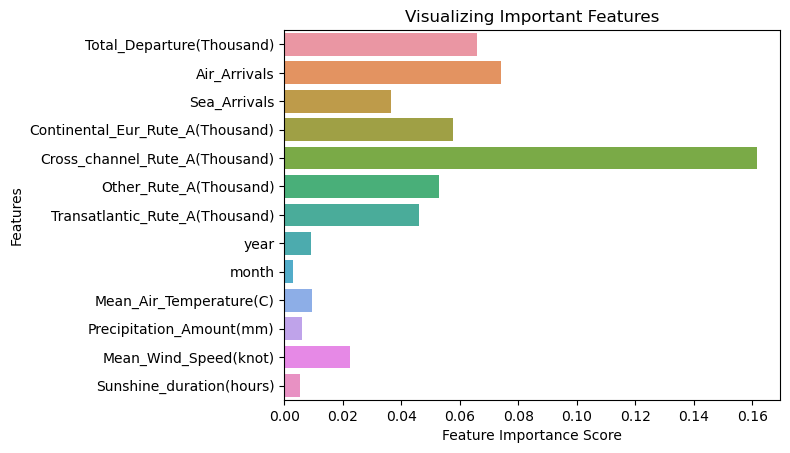

In [96]:
#Code source:https://stackoverflow.com/questions/70467781/feature-importance-with-svr
# Perform permutation importance
results = permutation_importance(svr_model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean
    
# Create a bar plot
sns.barplot(x=importance, y=X.columns)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()


#### Optimizing SVR Performance By Hypermeter Tuning

In [97]:
#Krnel types in Support Vector Regression
kernel=['sigmoid', 'rbf', 'poly','linear']
#Krnel coefficient for 
gamma =['scale', 'auto']
# Regularization parameter
c= [0.1, 1, 10, 0.01, 0.001, 100]
# Epsilon value
epsilon= [0.01, 0.1, 1, 0.001, 10, 100]

# Create the random grid
random_grid = {'kernel': kernel,
               'gamma':gamma,
               'C': c,
               'epsilon': epsilon}
               
print(random_grid)

# Use the random grid to search for best hyperparameters
# search across 500 different combinations, and use all available cores
svr_random = RandomizedSearchCV(estimator = svr_model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
svr_random.fit(X_train, y_train)
# Show the best Parameter
svr_random.best_params_
print("-----The Best Parameters-----")
print ("The Best Parameters:{}". format(svr_random.best_params_))

#Predictions 
y_pred_Random = svr_random.predict(X_test)
y_train_pred_Random=svr_random.predict(X_train)
 
#codesource: Totorial 2 MLWeeK2 class
print("-----Train set R2-----")
print("R-squared of the model in training set is: {}".format(svr_random.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr_random.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred_Random)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_Random) / y_test)) * 100))

{'kernel': ['sigmoid', 'rbf', 'poly', 'linear'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 0.01, 0.001, 100], 'epsilon': [0.01, 0.1, 1, 0.001, 10, 100]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
-----The Best Parameters-----
The Best Parameters:{'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.001, 'C': 1}
-----Train set R2-----
R-squared of the model in training set is: 0.9999992298356158
-----Test set statistics-----
R-squared of the model in test set is: 0.9999986419276727
Root mean squared error of the prediction is: 0.0007288176030316592
Mean absolute percentage error of the prediction is: 0.6630043417644301


#### Building Ridge Regressor Model &  Model Evaluation

In [98]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

#Predection
y_ridge_train_pred = ridge_model.predict(X_train)
y_ridge_pred = ridge_model.predict(X_test)



#codesource: Totorial 3 MLWeeK3 class
print("R-squared of the model in training set is: {}".format(ridge_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_ridge_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_ridge_pred) / y_test)) * 100))

R-squared of the model in training set is: 0.9997558648774527
-----Test set statistics-----
R-squared of the model in test set is: 0.9995979463171548
Root mean squared error of the prediction is: 0.012540054555886164
Mean absolute percentage error of the prediction is: 10.447693288706738


<Axes: title={'center': 'Ridge Coefficients'}>

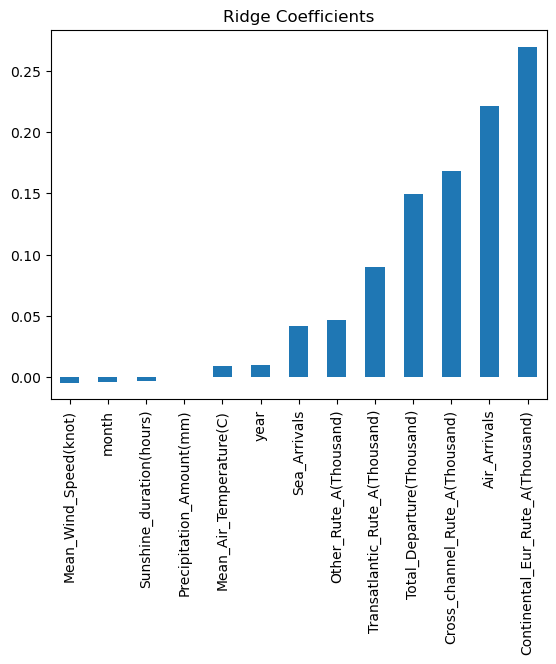

In [99]:
#Code Source:https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
#checking the magnitude of coefficients
from pandas import Series
predictors = X_train.columns
coef = Series(ridge_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Ridge Coefficients')


#### Optimizing the Performance of Ridge Regressor by Hyper Tuning

In [100]:
#alpha values, controlling regularization strength.
alpha = [0.01, 0.07, 0.1,0.5,0.9, 1]
#Whether to fit the intercept for this model
fit_intercept=  [True, False]
#Solver to use in the computational routines
solver = ['auto', 'sqrt']

# Create the random grid
random_grid_ridge = {'alpha': alpha,
               'fit_intercept': fit_intercept,
               'solver': solver}
              
print(random_grid_ridge)

# Use the random grid to search for best hyperparameters
# search across 100 different combinations, and use all available cores
ridge_random = RandomizedSearchCV(estimator = ridge_model, param_distributions = random_grid_ridge, 
                                  n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ridge_random.fit(X_train, y_train)
# Show the best Parameter
print("-----The Best Parameters-----")
print ("The Best Parameters:{}". format(ridge_random.best_params_))

#Predictions 
y_ridg_best_pred = ridge_random.predict(X_train)
y_ridge_test_best_preds = ridge_random.predict(X_test)

 
#codesource: Totorial 2 MLWeeK2 class
print("-----Train set R2-----")
print("R-squared of the model in training set is: {}".format(ridge_random.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_random.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_ridge_test_best_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_ridge_test_best_preds) / y_test)) * 100))

{'alpha': [0.01, 0.07, 0.1, 0.5, 0.9, 1], 'fit_intercept': [True, False], 'solver': ['auto', 'sqrt']}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
-----The Best Parameters-----
The Best Parameters:{'solver': 'auto', 'fit_intercept': True, 'alpha': 0.01}
-----Train set R2-----
R-squared of the model in training set is: 0.999999749375581
-----Test set statistics-----
R-squared of the model in test set is: 0.999999670061898
Root mean squared error of the prediction is: 0.00035923086117486486
Mean absolute percentage error of the prediction is: 0.27048257264600434


## Reference: 
* Machine Learning Classes.
* <p>https://machinelearningmastery.com/elastic-net-regression-in-python/</p>
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
* All Code sources were mentioned prior the cells that it was used for